<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>From Modeling to Evaluation</font></h1>

## Introduction

In this lab, we will continue learning about the data science methodology, and focus on the **Modeling** and **Evaluation** stages.

------------

## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Recap](#0)<br>
2. [Data Modeling](#2)<br>
3. [Model Evaluation](#4)<br>
</div>
<hr>

# Recap <a id="0"></a>

In Lab **From Understanding to Preparation**, we explored the data and prepared it for modeling.

The data was compiled by a researcher named Yong-Yeol Ahn, who scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig1_allrecipes.png" width=500>

www.allrecipes.com

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig2_epicurious.png" width=500>

www.epicurious.com

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig3_menupan.png" width=500>

www.menupan.com

For more information on Yong-Yeol Ahn and his research, you can read his paper on [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf).

<strong> Important note:</strong> Please note that you are not expected to know how to program in R. This lab is meant to illustrate the stages of modeling and evaluation of the data science methodology, so it is totally fine if you do not understand the individual lines of code. We have a full course on programming in R, <a href="http://cocl.us/RP0101EN_DS0103EN_LAB4_R">R101</a>, so please feel free to complete the course if you are interested in learning how to program in R.

### Using this notebook:

To run any of the following cells of code, you can type **Shift + Enter** to excute the code in a cell.

We already placed the data on an IBM server for your convenience, so let's download it from server and read it into a dataframe called **recipes**.

In [1]:
# click here and press Shift + Enter
download.file("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/data/recipes.csv",
              destfile = "/resources/data/recipes.csv", quiet = TRUE)

recipes <- read.csv("/resources/data/recipes.csv") # takes 30 seconds

We will repeat the preprocessing steps that we implemented in Lab **From Understanding to Preparation** in order to prepare the data for modeling. For more details on preparing the data, please refer to Lab **From Understanding to Preparation**.

In [2]:
# fix name of the column displaying the cuisine
colnames(recipes)[1] = "cuisine"

# convert cuisine names to lower case
recipes$cuisine <- tolower(as.character(recipes$cuisine)) 

# make the cuisine names consistent
recipes$cuisine[recipes$cuisine == "austria"] <- "austrian"
recipes$cuisine[recipes$cuisine == "belgium"] <- "belgian"
recipes$cuisine[recipes$cuisine == "china"] <- "chinese"
recipes$cuisine[recipes$cuisine == "canada"] <- "canadian"
recipes$cuisine[recipes$cuisine == "netherlands"] <- "dutch"
recipes$cuisine[recipes$cuisine == "france"] <- "french"
recipes$cuisine[recipes$cuisine == "germany"] <- "german"
recipes$cuisine[recipes$cuisine == "india"] <- "indian"
recipes$cuisine[recipes$cuisine == "indonesia"] <- "indonesian"
recipes$cuisine[recipes$cuisine == "iran"] <- "iranian"
recipes$cuisine[recipes$cuisine == "israel"] <- "jewish"
recipes$cuisine[recipes$cuisine == "italy"] <- "italian"
recipes$cuisine[recipes$cuisine == "japan"] <- "japanese"
recipes$cuisine[recipes$cuisine == "korea"] <- "korean"
recipes$cuisine[recipes$cuisine == "lebanon"] <- "lebanese"
recipes$cuisine[recipes$cuisine == "malaysia"] <- "malaysian"
recipes$cuisine[recipes$cuisine == "mexico"] <- "mexican"
recipes$cuisine[recipes$cuisine == "pakistan"] <- "pakistani"
recipes$cuisine[recipes$cuisine == "philippines"] <- "philippine"
recipes$cuisine[recipes$cuisine == "scandinavia"] <- "scandinavian"
recipes$cuisine[recipes$cuisine == "spain"] <- "spanish_portuguese"
recipes$cuisine[recipes$cuisine == "portugal"] <- "spanish_portuguese"
recipes$cuisine[recipes$cuisine == "switzerland"] <- "swiss"
recipes$cuisine[recipes$cuisine == "thailand"] <- "thai"
recipes$cuisine[recipes$cuisine == "turkey"] <- "turkish"
recipes$cuisine[recipes$cuisine == "irish"] <- "uk-and-irish"
recipes$cuisine[recipes$cuisine == "uk-and-ireland"] <- "uk-and-irish"
recipes$cuisine[recipes$cuisine == "vietnam"] <- "vietnamese"

# remove data for cuisines with < 50 recipes:
t <- sort(base::table(recipes$cuisine), decreasing = T)
filter_list <- names( t[ t >= 50 ] )
recipes <- recipes[recipes$cuisine %in% filter_list, ]
recipes$cuisine <- as.factor(as.character(recipes$cuisine))
sort(base::table(recipes$cuisine), decreasing = T)

# convert all of the columns into factors (to run the classification model later)
recipes[,names(recipes)] <- lapply(recipes[,names(recipes)] , as.factor)


               american                 italian                 mexican 
                  40150                    3250                    2390 
                 french                   asian              east_asian 
                   1264                    1193                     951 
                 korean                canadian                  indian 
                    799                     774                     598 
                western                 chinese      spanish_portuguese 
                    450                     442                     416 
           uk-and-irish       southern_soulfood                  jewish 
                    368                     346                     329 
               japanese                  german           mediterranean 
                    320                     289                     289 
                   thai            scandinavian           middleeastern 
                    289                     250   

<hr>

# Data Modeling <a id="2"></a>

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig4_flowchart_data_modeling.png" width=500>

Let's start by importing and installing the R libraries relevant to decision trees

In [3]:
# load libraries
library(rpart)

if("rpart.plot" %in% rownames(installed.packages()) == FALSE) {install.packages("rpart.plot", 
    repo = "http://mirror.las.iastate.edu/CRAN/")}
library(rpart.plot)

print("Libraries loaded!")

[1] "Libraries loaded!"


Check the data again!

In [4]:
head(recipes)

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,vietnamese,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
2,vietnamese,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
3,vietnamese,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
4,vietnamese,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
5,vietnamese,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
6,vietnamese,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No


## [bamboo_tree] Only Asian and Indian Cuisines

Here, we are creating a decision tree for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason for this is because the decision tree does not run well when the data is biased towards one cuisine, in this case American cuisines. One option is to exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. Let's go with the latter solution.

Let's build our decision tree using the data pertaining to the Asian and Indian cuisines and name our decision tree *bamboo_tree*.

In [5]:
# select subset of cuisines
cuisines_to_keep = c("korean", "japanese", "chinese", "thai", "indian")
cuisines_data <- recipes[recipes$cuisine %in% cuisines_to_keep, ]
cuisines_data$cuisine <- as.factor(as.character(cuisines_data$cuisine))

bamboo_tree <- rpart(formula=cuisine ~ ., data=cuisines_data, method ="class")

print("Decision tree model saved to bamboo_tree!")

[1] "Decision tree model saved to bamboo_tree!"


Let's plot the decision tree and examine how it looks like.

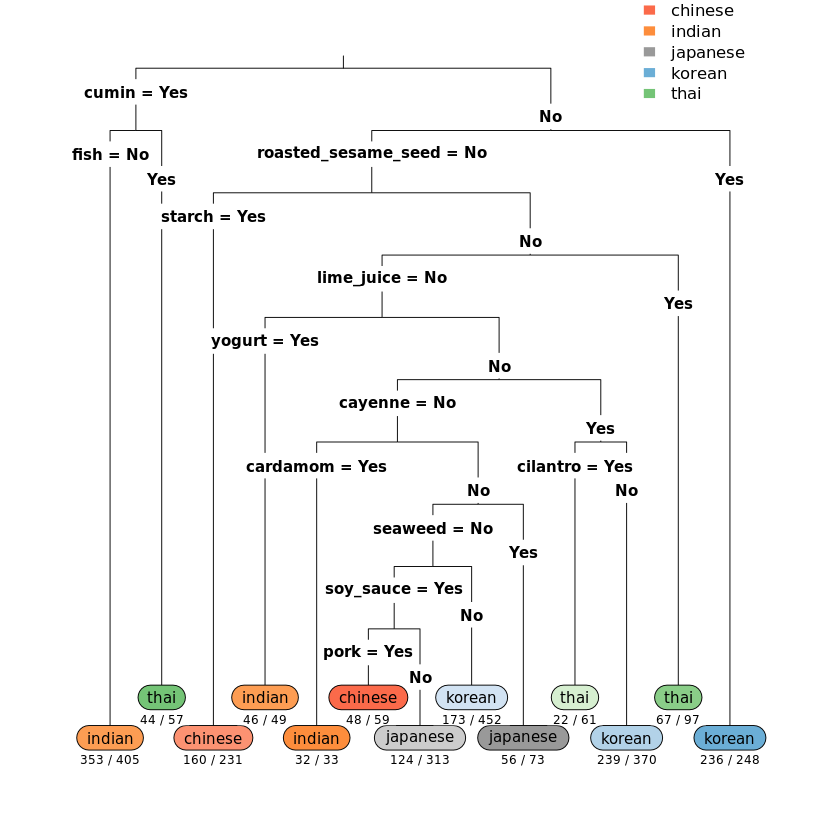

In [6]:
# plot bamboo_tree
rpart.plot(bamboo_tree, type=3, extra=2, under=TRUE, cex=0.75, varlen=0, faclen=0, Margin=0.03)

According to the above decision tree:
* If a recipe contains *cumin* and *fish*, then it is most likely a **Thai** recipe.
* If a recipe contains *cumin* but no *fish*, then it is most likely an **Indian** recipe.
* If a recipe does not contain *cumin* and contains *roasted_sesame_seed*, then it is most likely a **Korean** recipe.

You can analyze the remaining branches of the tree to come up with similar rules for determining the cuisine of different recipes. 

Feel free to select another subset of cuisines and build a decision tree of their recipes. You can select some European cuisines and build a decision tree to explore the ingredients that differentiate them.

# Model Evaluation <a id="4"></a>

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig5_flowchart_evaluation.png" width=500>

To evaluate our model of Asian and Indian cuisines, we will split our dataset into a training set and a test set. We will build the decision tree using the training set. Then, we will test the model on the test set and compare the cuisines that the model predicts to the actual cuisines. 

Let's first create a new dataframe using only the data pertaining to the Asian and Indian cuisines, and let's call the new dataframe **bamboo**.

In [7]:
bamboo <- recipes[recipes$cuisine %in% c("korean", "japanese", "chinese", "thai", "indian"),]

Let's see how many recipes exist for each cuisine.

In [8]:
base::table(as.factor(as.character(bamboo$cuisine)))


 chinese   indian japanese   korean     thai 
     442      598      320      799      289 

Let's remove 30 recipes from each cuisine to use as the test set, and let's name this set **bamboo_test**.

In [9]:
# set sample size
sample_n <- 30

Create a dataframe containing 30 recipes from each cuisine, selected randomly.

In [10]:
# take 30 recipes from each cuisine
set.seed(4) # set random seed
korean <- bamboo[base::sample(which(bamboo$cuisine == "korean") , sample_n), ]
japanese <- bamboo[base::sample(which(bamboo$cuisine == "japanese") , sample_n), ]
chinese <- bamboo[base::sample(which(bamboo$cuisine == "chinese") , sample_n), ]
thai <- bamboo[base::sample(which(bamboo$cuisine == "thai") , sample_n), ]
indian <- bamboo[base::sample(which(bamboo$cuisine == "indian") , sample_n), ]

# create the dataframe
bamboo_test <- rbind(korean, japanese, chinese, thai, indian)

Check that there are 30 recipes for each cuisine.

In [11]:
# check that we have 30 recipes from each cuisine
base::table(as.factor(as.character(bamboo_test$cuisine)))


 chinese   indian japanese   korean     thai 
      30       30       30       30       30 

Next, let's create the training set by removing the test set from the **bamboo** dataset, and let's call this set **bamboo_train**.

In [12]:
bamboo_train <- bamboo[!(rownames(bamboo) %in% rownames(bamboo_test)),]
bamboo_train$cuisine <- as.factor(as.character(bamboo_train$cuisine))

Check that there are 30 _fewer_ recipes now for each cuisine.

In [13]:
base::table(bamboo_train$cuisine)


 chinese   indian japanese   korean     thai 
     412      568      290      769      259 

Let's build the decision tree using the training set, **bamboo_train**, and name the generated tree **bamboo_tree_pred** for prediction.

In [14]:
bamboo_train_tree <- rpart(formula=cuisine ~ ., data=bamboo_train, method="class")

Let's plot the decision tree and explore it.

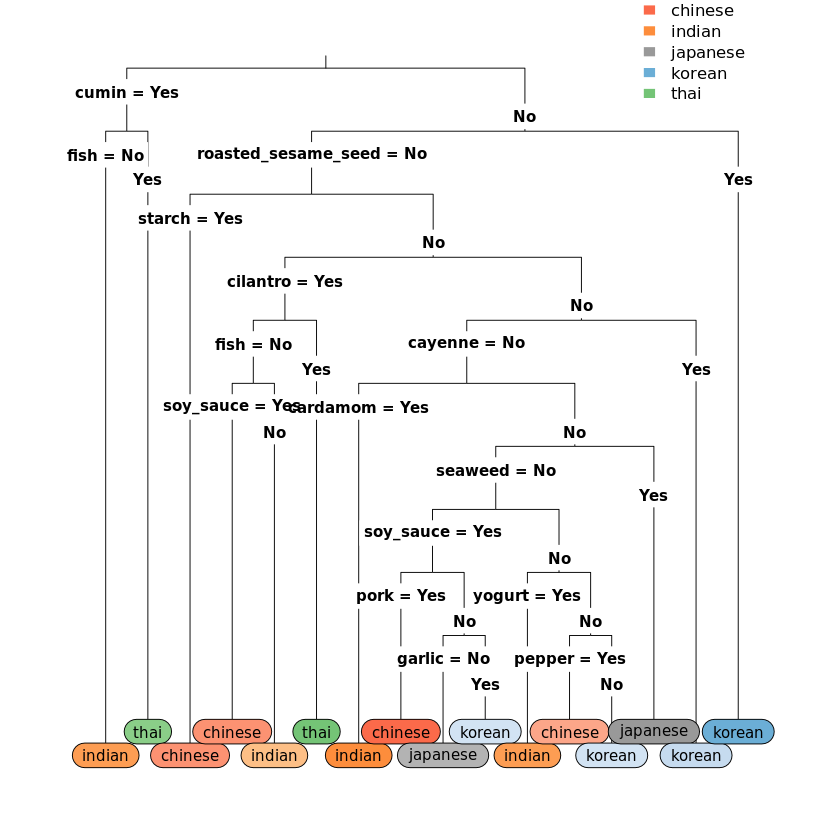

In [15]:
rpart.plot(bamboo_train_tree, type=3, extra=0, under=TRUE, cex=0.75, varlen=0, faclen=0, Margin=0.03)

It is obvious how removing 30 recipes from each cuisine resulted in more decisions in the tree.

#### Now let's test our model on the test data.

In [16]:
bamboo_pred_cuisines <- predict(bamboo_train_tree, subset(bamboo_test, select=-c(cuisine)), type="class")

To quantify how well the decision tree is able to determine the cuisine of each recipe correctly, we will create a confusion matrix which presents a nice summary on how many recipes from each cuisine are correctly classified. It also sheds some light on what cuisines are being confused with what other cuisines.

So let's go ahead and create the confusion matrix for how well the decision tree is able to correctly classify the recipes in **bamboo_test**.

In [18]:
bamboo_confusion_matrix <- base::table(
    paste(as.character(bamboo_test$cuisine),"_true", sep=""),
    paste(as.character(bamboo_pred_cuisines),"_pred", sep="")
)

round(prop.table(bamboo_confusion_matrix, 1)*100, 1)

               
                chinese_pred indian_pred japanese_pred korean_pred thai_pred
  chinese_true          60.0         0.0           3.3        36.7       0.0
  indian_true            0.0        90.0           0.0        10.0       0.0
  japanese_true         20.0         3.3          33.3        40.0       3.3
  korean_true            6.7         0.0          16.7        76.7       0.0
  thai_true              3.3        20.0           0.0        33.3      43.3

The rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. We make the following observations:

* Using the first row in the confusion matrix, 60% of the **Chinese** recipes in **bamboo_test** were correctly classified by our decision tree whereas 36.7% of the **Chinese** recipes were misclassified as **Korean** and 3.3% were misclassified as **Japenese**.

* Using the Indian row, 90% of the **Indian** recipes in **bamboo_test** were correctly classified by our decision tree and 10% of the **Indian** recipes were misclassified as **Korean**.

How many **Japanese** recipes were correctly classified by our decision tree?

How many **Korean** recipes were misclassified as **Japanese**?

What cuisine has the least number of recipes correctly classified by the decision tree?

<br>
<hr>

### Thank you for completing this lab!

This notebook was created by [Polong Lin](https://ca.linkedin.com/in/polonglin) and [Alex Aklson](https://www.linkedin.com/in/aklson/). We hope you found this lab session interesting. Feel free to contact us if you have any questions!

This notebook is part of the free course on **Cognitive Class** called *Data Science Methodology*. If you accessed this notebook outside the course, you can take this free self-paced course, online by clicking [here](http://cocl.us/DS0103EN_LAB4_R).

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).